# Visualizing the Aftermath of the Eaton and Palisades Fires
**Author:** Joshua Ferrer-Lozano  
**GitHub Repository:** []()
---
![False Color Composite Example](vw.png)
---

### About the Data
- **Fire Perimeters:** Shapefiles from CAL FIRE/NIFC FIRIS public view, representing the boundaries of the Palisades and Eaton fires.  
- **Raster Data:** Landsat 8 NetCDF file clipped to the fire areas, containing spectral bands (red, green, blue, NIR, SWIR).  


### Purpose
This notebook demonstrates how to use Landsat 8 surface reflectance data and fire perimeter shapefiles to visualize the aftermath of the Eaton and Palisades fires in Los Angeles County.  

### Highlights
- Importing and exploring fire perimeter shapefiles with GeoPandas.  
- Loading Landsat 8 raster data with xarray/netCDF4.  
- Creating true color and false color composites to visualize fire impacts.  
- Overlaying fire perimeters on raster imagery for spatial context.  

## Repository Structure
```text
├── data/
├── eds220-hw4-task2-false-color-Ferrer-Lozano.ipynb
└── README.md
```

## Data Sources

Eaton and Palisades Fire Perimeter Data: Dissolved fire perimeter boundaries of the Eaton and Palisades Fires (January 2025). Collected by the NIFC FIRIS program and used to overlay fire boundaries on Landsat 8 imagery.

Landsat 8 Surface Reflectance Data: Collection of spectral bands (red, green, blue, near-infrared, and shortwave infrared) from Landsat Collection 2 Level‑2 atmospherically corrected surface reflectance data.

## Data Access
Fire Perimeter Shapefiles: Not included in this repository. Download from ArcGIS Hub: link. Both files must be downloaded separately.

Landsat 8 Data: Not included in this repository due to file size. Available via a shared Google Drive folder for UCSB EDS 220 or directly from the USGS/Microsoft Planetary Computer.

## Requirements
This analysis requires the following Python libraries:

os

NumPy

Rioxarray

Matplotlib

GeoPandas

Xarray

## References
### References
- CAL FIRE. (2025). *California Fire Perimeters (Public View)*. https://www.fire.ca.gov  
- U.S. Geological Survey. (2025). *Landsat 8 Collection 2 Level‑2 surface reflectance data*. https://landsat.usgs.gov  
- Bennett, M. M., Chen, J. K., Alvarez León, L. F., & Gleason, C. J. (2022). *The politics of pixels: A review and agenda for critical remote sensing*. Progress in Human Geography, 46(3), 729–752. https://doi.org/10.1177/03091325221074691 
- Galaz García, C., Cawse‑Nicholson, K., Frew, A., & Fontenot, R. (2024). EDS 220: Working with environmental datasets [Course materials]. Bren School of Environmental Science & Management, University of California, Santa Barbara. https://meds-eds-220.github.io/MEDS-eds-220-course/

## 1. Import Libraries and Load in Data

In [1]:

# Import required libraries
import os
import numpy as np
import rioxarray as rio
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr


## Load in Data

We use GeoPandas to read in the Eaton and Palisades fire perimeter shapefiles. These files contain polygon geometries representing the boundaries of the burned areas.

In [3]:
# Load fire perimeter shapefiles
eaton = gpd.read_file('data\eaton_fire\Eaton_Perimeter_20250121.shp')

# Load fire perimeter shapefiles
palisades = gpd.read_file('data/Palisades_Perimeter_20250121.shp')

## Fire Perimeter Data Exploration

In [4]:
# Explore the data
print("Eaton Fire Perimeter:")
print(eaton.info())

print("\nPalisades Fire Perimeter:")
print(palisades.info())

Eaton Fire Perimeter:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes
None

Palisades Fire Perimeter:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memor

## 3. NetCDF Data Import and Exploration

We open the Landsat 8 NetCDF file using xarray with the netCDF4 engine. This raster contains multiple spectral bands that we will use to create composites.

In [6]:
# a,b Activate and Import netCDF4
import netCDF4
# c) Check activation and version
print(netCDF4.__version__)

1.7.3


In [5]:

# Generate variable for path
NC_fp = os.path.join('data','landsat8-2025-02-23-palisades-eaton.nc')

# Use netCDF4
landsat = xr.open_dataset("data/landsat8-2025-02-23-palisades-eaton.nc", engine="netcdf4")



## Explore Landsat 8 data and Summarize

Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables, dimensions, and coordinates.



In [8]:
print(landsat)

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...


In [9]:
# Explore dimensions and coordinates
print("Dimensions:", landsat.dims)
print("\nCoordinates:", list(landsat.coords))
print("\nData variables:", list(landsat.data_vars))

Dimensions: FrozenMappingWarningOnValuesAccess({'y': 1418, 'x': 2742})

Coordinates: ['y', 'x', 'time']

Data variables: ['red', 'green', 'blue', 'nir08', 'swir22', 'spatial_ref']


In [10]:

# Print Landsat CRS
print(landsat.rio.crs, "\n")

# Print the CRS
print(landsat.spatial_ref.crs_wkt, "\n")

# Retrieve the information
landsat.rio.write_crs(landsat.spatial_ref.crs_wkt, inplace=True)

# Print the CRS of landsat
print("Updated CRS:", landsat.rio.crs, "\n")

None 

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]] 

Updated CRS: EPSG:32611 



## Summary of Landsat Raster
- Contains spectral bands: `red`, `green`, `blue`, `nir08`, `swir22`.  
- Data is three‑dimensional, with coordinates for `x`, `y`, and `time`.  
- CRS metadata was restored to ensure geospatial referencing.  
- Raster data is suitable for creating composites (true color, false color) and overlaying with fire perimeter

## 4. Restore and Check Geospatial Information

In [5]:
# Check CRS
print(f"Eaton CRS: {eaton.crs}")
print(f"Palisades CRS: {palisades.crs}")

# Check if projected or geographic
print(f"\nIs Eaton CRS geographic? {eaton.crs.is_geographic}")
print(f"Is Palisades CRS geographic? {palisades.crs.is_geographic}")

Eaton CRS: EPSG:3857
Palisades CRS: EPSG:3857

Is Eaton CRS geographic? False
Is Palisades CRS geographic? False


## Summary of Shapefiles
- Eaton and Palisades shapefiles contain polygon geometries and tabular attributes.  
- Both have the same column structure and CRS.  
- CRS is projected (not geographic), ensuring spatial alignment.  
- Shapefiles do not contain spectral bands — they only represent fire perimeter boundaries.  

## Brief Summary

## 5. True Color Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


c:\Users\joshu\.conda\envs\eds220-env\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


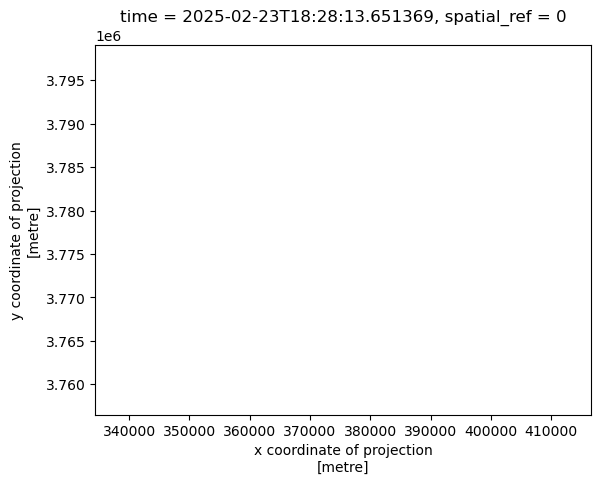

In [11]:
# Select the specified red, green, and blue variables of the xarray and plot
landsat[["red", "green", "blue"]].to_array().plot.imshow()

Bands with NaN values: ['green', 'blue']


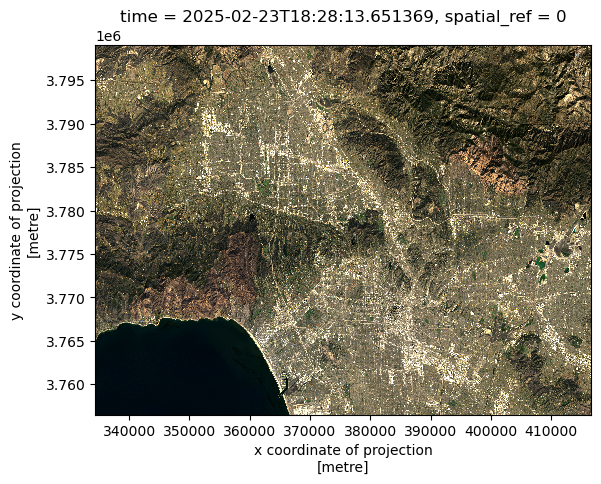

In [16]:

# Identify which bands have nan values using numpy.isnan()
nan_bands = []
for band in ['red', 'green', 'blue', 'nir08', 'swir22']:
    if np.isnan(landsat[band]).any():
        nan_bands.append(band)

print("Bands with NaN values:", nan_bands)

# Substitute any nan values for 0
landsat = landsat.fillna(0)

# Re-plot with the true color image
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)
plt.show()

## Comparison of Outputs

Part A produced a blank plot with a warning of "Part A produced a blank plot related to  valid range". The RGB values are outliers because of the clouds and prevent accurate plotting.

# 6. False Color Image

Data Cleaning and Visualization - False-Color

In [17]:
# Specify bands and check for nans
bands = ["red", "green", "blue"]

for band in bands:
    has_nan = np.isnan(landsat[band].values).any()
    print(f"{band} contains NaN values? {has_nan}")

red contains NaN values? False
green contains NaN values? False
blue contains NaN values? False


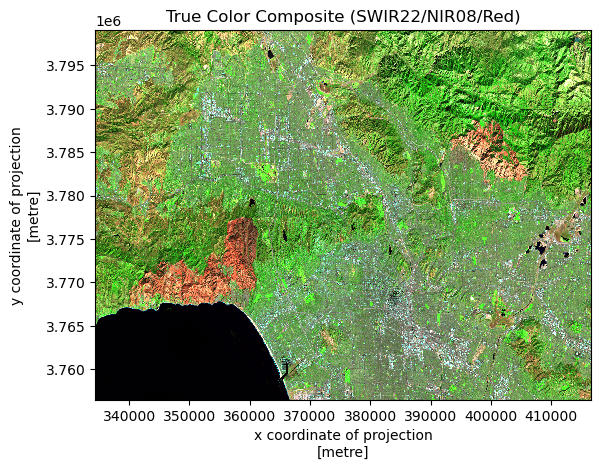

In [18]:
# Specify bands for false color composite
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)
plt.title('True Color Composite (SWIR22/NIR08/Red)')
plt.show()


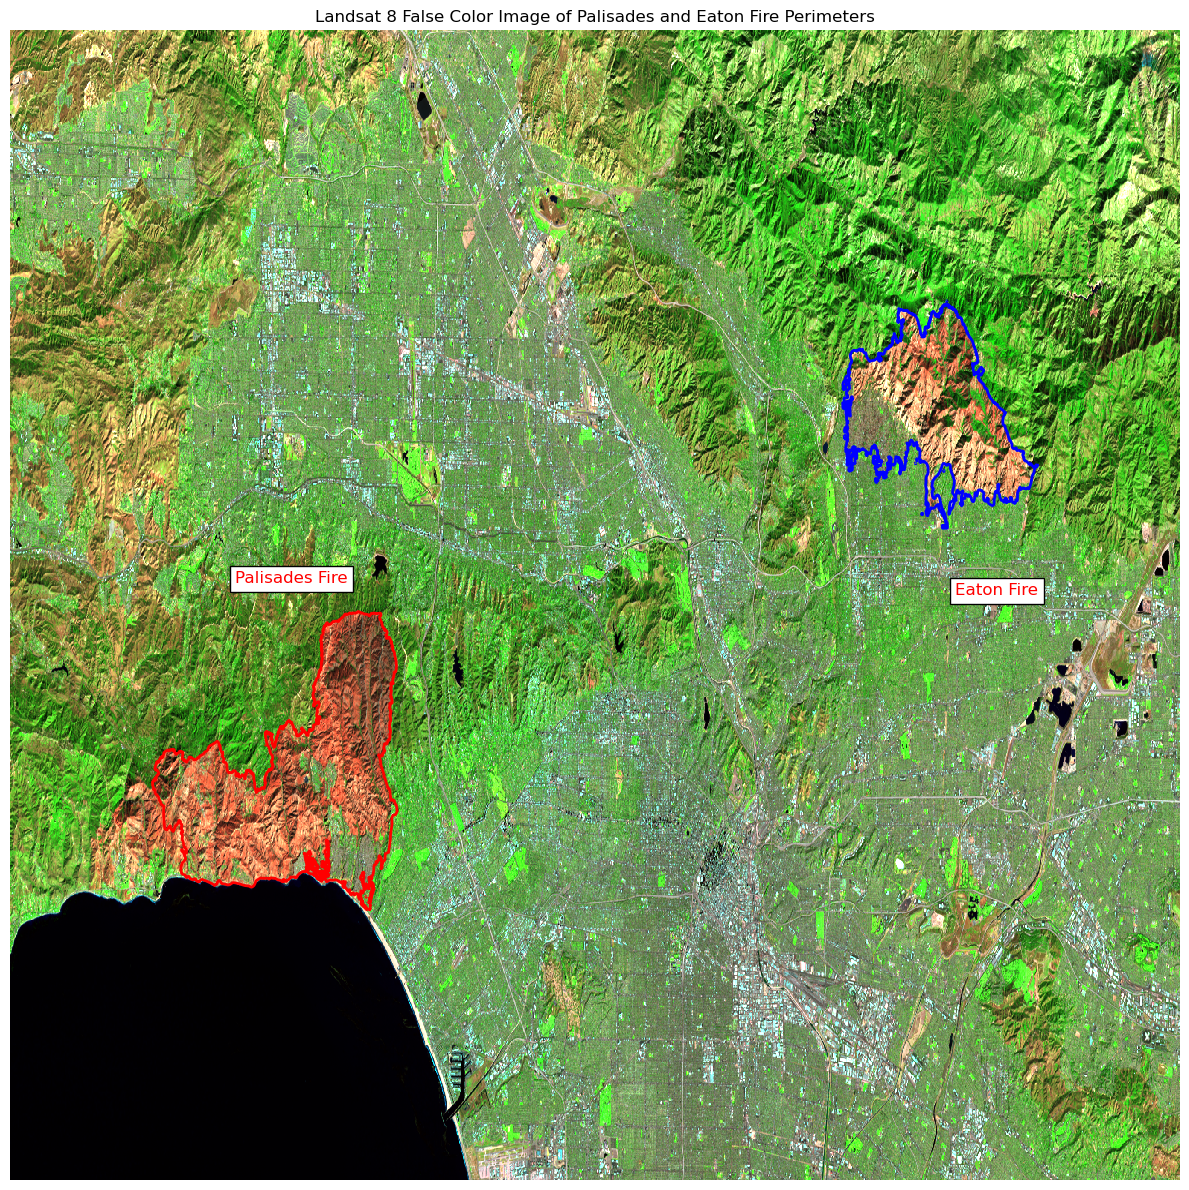

In [32]:
# Reproject fire perimeters to match Landsat CRS
eaton = eaton.to_crs(landsat.rio.crs)
palisades = palisades.to_crs(landsat.rio.crs)

# Create comprehensive map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot false color composite
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(
    ax=ax,
    robust=True,
    add_colorbar=False
)
# Add Palisades and Eaton fire perimeters
eaton.boundary.plot(ax=ax, edgecolor='blue', linewidth=2)
palisades.boundary.plot(ax=ax, edgecolor='red', linewidth=2)


# Add false color raster
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust=True)

# Add title
ax.set_title('Landsat 8 False Color Image of Palisades and Eaton Fire Perimeters')

# Add labels with gray background
plt.figtext(0.20, 0.51, "Palisades Fire", color='red', fontsize=12, bbox=dict(facecolor='white'))
plt.figtext(0.80, 0.50, "Eaton Fire", color='red', fontsize=12, bbox=dict(facecolor='white'))

# Remove axes
ax.axis('off')

# Display the map
plt.tight_layout()
plt.show()

Image Description:

This image is a false color composite image of the Eaton and Palisades fire perimeters from the Landsat 8 satelite. The image utilizes infrared (SWIR), near-infrared (NIR) and red bands. These bands in particular are used to illustrate severity of bruns and vegetation gain/loss.  The intensity of the of the color display the either the severity of burn or the intensity of vegetation recovery.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


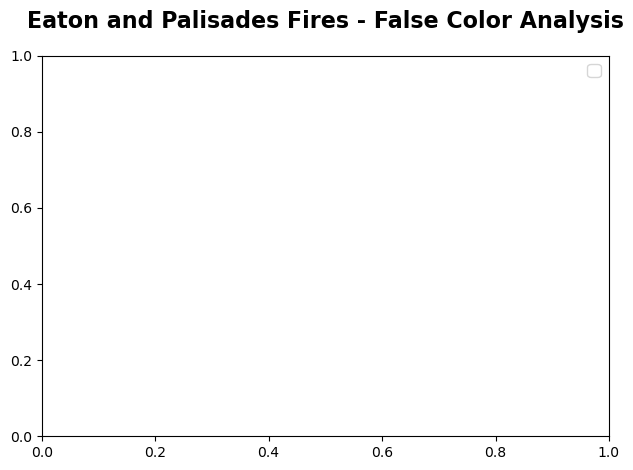

In [20]:
# Plot false color composite
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(
    ax=ax,
    robust=True,
    add_colorbar=False
)

# Overlay fire perimeters
eaton.boundary.plot(ax=ax, edgecolor='yellow', linewidth=2, label='Eaton Fire')
palisades.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label='Palisades Fire')

# Add labels and formatting
plt.title('Eaton and Palisades Fires - False Color Analysis',
          fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', fontsize=12)
ax.set_xlabel('Easting (meters)', fontsize=12)
ax.set_ylabel('Northing (meters)', fontsize=12)

# Add fire name annotations
ax.text(eaton.geometry.centroid.x.values[0],
        eaton.geometry.centroid.y.values[0] - 2700,
        'Eaton Fire',
        color='black', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

ax.text(palisades.geometry.centroid.x.values[0] - 22000,
        palisades.geometry.centroid.y.values[0] + 8000,
        'Palisades Fire',
        color='black', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()
